# Drug Activity Prediction

### Problem Statement

The goal of this project is to allow us to develop predictive models that can determine given a particular compound whether it is active (1) or not (0). As such, the goal would be developing the best binary classification model. A molecule can be represented by 100000 binary features which represent their topological shapes and other characteristics important for binding.

In [1]:
# Importing basic libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\INeuron\Project_1\Drug-Activity-Prediction-Dorothea-Dataset-master

27-09-2022  22:41    <DIR>          .
27-09-2022  22:41    <DIR>          ..
27-09-2022  10:57    <DIR>          .ipynb_checkpoints
27-09-2022  22:36             2,870 application.py
27-09-2022  11:14             6,190 demo.xlsx
27-09-2022  11:16             5,144 demo_csv.csv
30-08-2022  12:20           256,742 Drug_Activity_Prediction_1.ipynb
04-09-2022  18:58           258,368 Drug_Activity_Prediction_2.ipynb
04-09-2022  16:27           234,058 Drug_Activity_Prediction_3.ipynb
04-09-2022  19:21           195,587 Drug_Activity_Prediction_4.ipynb
04-09-2022  21:23           160,196 Drug_Activity_Prediction_5.ipynb
27-09-2022  22:41           293,347 Drug_Activity_Prediction_final.ipynb
27-09-2022  11:12            11,040 dt.sav
23-08-2022  09:03             6,502 PR2 - Drug Activity Prediction.ipynb
26-08-2022 

# Step-1: Reading the data

In [3]:
# Reading the training data
train_data = pd.read_csv('TRAIN.csv',header=None)
train_X = train_data.iloc[:,1:]
train_Y = train_data[0]

In [4]:
train_Y.rename('Y',inplace=True)

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    1
Name: Y, Length: 800, dtype: int64

In [5]:
# Reading the testing data
train_X

,1,2,3,4,5,6,7,8,9,10,...,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118,307,367,478,505,512,807,878,939,1024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,184,284,297,320,375,445,588,658,1108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,149,433,704,711,892,988,1056,1070,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84,118,279,316,435,505,584,629,849,1029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,374,1031,1271,1312,1452,1517,1628,1668,1898,1958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,106,465,1095,1119,1176,1658,1669,1679,1813,1889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,140,273,303,354,383,436,619,640,798,866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,126,150,354,377,379,702,764,1099,1110,1220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Changing the column names of the train dataset to start from 0
for i in train_X.columns:
    train_X.rename(columns={i:(i-1)},inplace=True)
train_X

,0,1,2,3,4,5,6,7,8,9,...,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118,307,367,478,505,512,807,878,939,1024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,184,284,297,320,375,445,588,658,1108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,149,433,704,711,892,988,1056,1070,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84,118,279,316,435,505,584,629,849,1029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,374,1031,1271,1312,1452,1517,1628,1668,1898,1958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,106,465,1095,1119,1176,1658,1669,1679,1813,1889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,140,273,303,354,383,436,619,640,798,866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,126,150,354,377,379,702,764,1099,1110,1220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_data = pd.read_csv('TEST.csv',header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856
0,354,386,517,627,646,764,870,915,1364,1502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,225,360,394,433,445,1021,1205,1861,2036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,144,284,309,393,843,915,936,983,1183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,174,300,307,430,523,546,616,861,1108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,585,767,783,1176,1214,1224,1256,1303,1605,2102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,43,50,280,316,462,486,549,588,1048,1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,24,26,30,87,144,157,334,336,548,581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,56,61,91,106,321,478,540,688,781,816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,9,191,378,379,436,482,575,613,766,914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Temporarily Combining train and test data for ease of data preprocessing
df = pd.concat([train_X,test_data])

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118,307,367,478,505,512,807,878,939,1024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,184,284,297,320,375,445,588,658,1108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,149,433,704,711,892,988,1056,1070,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84,118,279,316,435,505,584,629,849,1029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,43,50,280,316,462,486,549,588,1048,1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,24,26,30,87,144,157,334,336,548,581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,56,61,91,106,321,478,540,688,781,816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,9,191,378,379,436,482,575,613,766,914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step-2: Data Preprocessing

In [10]:
# Removing all the columns for which the Nan values are greater than 15% of total train data

for col in df.columns:
    if df[col].isna().sum()> 0.15*(df.shape[0]):
        df.drop(columns=col,inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,93972.0,94210.0,94211.0,94226.0,94493.0,94583.0,94611.0,94618.0,94715.0,95145.0
1,118,307,367,478,505,512,807,878,939,1024,...,99610.0,99626.0,99731.0,99938.0,NaN,NaN,NaN,NaN,NaN,NaN
2,10,184,284,297,320,375,445,588,658,1108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,149,433,704,711,892,988,1056,1070,1234,...,98230.0,98316.0,98827.0,98881.0,98994.0,99091.0,99169.0,99257.0,99317.0,99426.0
4,84,118,279,316,435,505,584,629,849,1029,...,90336.0,90440.0,90745.0,90831.0,91187.0,91496.0,91737.0,91812.0,91826.0,91971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,43,50,280,316,462,486,549,588,1048,1115,...,98184.0,98356.0,98458.0,98680.0,98769.0,98789.0,98812.0,98908.0,98909.0,98938.0
346,24,26,30,87,144,157,334,336,548,581,...,95288.0,95304.0,95331.0,95337.0,95392.0,95472.0,95729.0,95932.0,95997.0,96034.0
347,56,61,91,106,321,478,540,688,781,816,...,95829.0,95951.0,96235.0,96377.0,96468.0,96493.0,96586.0,96832.0,96853.0,97016.0
348,9,191,378,379,436,482,575,613,766,914,...,73597.0,73601.0,73656.0,73754.0,73937.0,74206.0,74250.0,74282.0,74575.0,74594.0


In [11]:
# Checking for null values
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
      ... 
723    143
724    150
725    155
726    161
727    171
Length: 728, dtype: int64

In [12]:
# Replacing the null values with the Mean of that feature
B = df
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(B)
B = imputer.transform(B)
print(B)

[[1.91000000e+02 3.67000000e+02 6.14000000e+02 ... 9.46180000e+04
  9.47150000e+04 9.51450000e+04]
 [1.18000000e+02 3.07000000e+02 3.67000000e+02 ... 8.36310362e+04
  8.36504762e+04 8.35998917e+04]
 [1.00000000e+01 1.84000000e+02 2.84000000e+02 ... 8.36310362e+04
  8.36504762e+04 8.35998917e+04]
 ...
 [5.60000000e+01 6.10000000e+01 9.10000000e+01 ... 9.68320000e+04
  9.68530000e+04 9.70160000e+04]
 [9.00000000e+00 1.91000000e+02 3.78000000e+02 ... 7.42820000e+04
  7.45750000e+04 7.45940000e+04]
 [1.00000000e+01 5.60000000e+01 6.90000000e+01 ... 8.36310362e+04
  8.36504762e+04 8.35998917e+04]]


In [13]:
df_nonna = pd.DataFrame(B)
df_nonna

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,191.0,367.0,614.0,634.0,711.0,1202.0,1220.0,1311.0,1472.0,1730.0,...,93972.000000,94210.000000,94211.000000,94226.000000,94493.000000,94583.000000,94611.000,94618.000000,94715.000000,95145.000000
1,118.0,307.0,367.0,478.0,505.0,512.0,807.0,878.0,939.0,1024.0,...,99610.000000,99626.000000,99731.000000,99938.000000,83615.141732,83590.648461,83594.089,83631.036181,83650.476239,83599.891726
2,10.0,184.0,284.0,297.0,320.0,375.0,445.0,588.0,658.0,1108.0,...,83622.011472,83705.043103,83697.896718,83657.714425,83615.141732,83590.648461,83594.089,83631.036181,83650.476239,83599.891726
3,87.0,149.0,433.0,704.0,711.0,892.0,988.0,1056.0,1070.0,1234.0,...,98230.000000,98316.000000,98827.000000,98881.000000,98994.000000,99091.000000,99169.000,99257.000000,99317.000000,99426.000000
4,84.0,118.0,279.0,316.0,435.0,505.0,584.0,629.0,849.0,1029.0,...,90336.000000,90440.000000,90745.000000,90831.000000,91187.000000,91496.000000,91737.000,91812.000000,91826.000000,91971.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,43.0,50.0,280.0,316.0,462.0,486.0,549.0,588.0,1048.0,1115.0,...,98184.000000,98356.000000,98458.000000,98680.000000,98769.000000,98789.000000,98812.000,98908.000000,98909.000000,98938.000000
1146,24.0,26.0,30.0,87.0,144.0,157.0,334.0,336.0,548.0,581.0,...,95288.000000,95304.000000,95331.000000,95337.000000,95392.000000,95472.000000,95729.000,95932.000000,95997.000000,96034.000000
1147,56.0,61.0,91.0,106.0,321.0,478.0,540.0,688.0,781.0,816.0,...,95829.000000,95951.000000,96235.000000,96377.000000,96468.000000,96493.000000,96586.000,96832.000000,96853.000000,97016.000000
1148,9.0,191.0,378.0,379.0,436.0,482.0,575.0,613.0,766.0,914.0,...,73597.000000,73601.000000,73656.000000,73754.000000,73937.000000,74206.000000,74250.000,74282.000000,74575.000000,74594.000000


In [14]:
df_nonna.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
723    0
724    0
725    0
726    0
727    0
Length: 728, dtype: int64

In [15]:
# Scaling the Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_nonna = scaler.fit_transform(df_nonna)

In [16]:
# Splitting Training and Testing Scaled Data

train_data_final = pd.DataFrame(df_nonna[:800,:])
test_data_final = pd.DataFrame(df_nonna[800:,:])

In [17]:
train_data_final

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,0.641830,0.840012,1.309415,0.746270,0.464911,1.527357,1.054324,0.900028,0.922056,1.138531,...,0.649158,0.658627,0.660642,0.666273,6.880474e-01,0.697227,0.700193,0.699012,0.705148,0.738403
1,0.029789,0.472837,0.111022,0.105894,-0.246011,-0.561246,-0.043600,-0.161026,-0.293540,-0.361082,...,1.002777,0.998193,1.007518,1.026384,-9.204392e-16,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.875696,-0.279873,-0.291677,-0.637106,-0.884461,-0.975940,-1.005946,-0.871662,-0.934408,-0.182658,...,0.000000,0.000000,0.000000,0.000000,-9.204392e-16,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.230119,-0.494059,0.431240,1.033619,0.464911,0.588999,0.437572,0.275158,0.005228,0.084979,...,0.916222,0.916060,0.950710,0.959746,9.727451e-01,0.983163,0.989883,0.994154,0.998435,1.012208
4,-0.255271,-0.683766,-0.315936,-0.559112,-0.487587,-0.582435,-0.636426,-0.771193,-0.498800,-0.350461,...,0.421106,0.422260,0.442839,0.452237,4.789359e-01,0.501424,0.517533,0.520488,0.521030,0.535400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.176124,4.903422,4.497045,3.529444,3.022162,2.480850,2.138956,1.774846,1.893621,1.622825,...,0.000000,0.000000,0.000000,0.000000,-9.204392e-16,0.000000,0.000000,0.000000,0.000000,0.000000
796,-0.070820,1.439733,3.643129,2.737183,2.069664,2.907652,2.247951,1.801801,1.699764,1.476263,...,0.811730,0.806466,0.817176,0.827037,8.452288e-01,0.852437,0.862897,0.864365,0.886142,0.897787
797,0.214240,0.264771,-0.199493,-0.403123,-0.667043,-0.791295,-0.543382,-0.744238,-0.615114,-0.696689,...,-1.306472,-1.305977,-1.292986,-1.292837,-1.292945e+00,-1.287638,-1.288036,-1.288346,-1.291720,-1.275318
798,0.096862,-0.487939,0.047948,-0.308708,-0.680847,0.013877,-0.157912,0.380528,0.096454,0.055241,...,0.375131,0.377244,0.383581,0.391525,3.962022e-01,0.404505,0.408915,0.420284,0.426072,0.431341


In [18]:
test_data_final

,0,1,2,3,4,5,6,7,8,9,...,718,719,720,721,722,723,724,725,726,727
0,2.008441,0.956285,0.838791,0.717535,0.240591,0.201548,0.123880,-0.070358,0.675744,0.654237,...,-0.085238,-0.037495,-0.036692,-0.021417,-1.696053e-02,0.032498,0.037556,0.037725,0.038590,0.051173
1,-0.766702,-0.028970,0.077059,-0.238924,-0.494489,-0.764052,0.525300,0.640278,1.809236,1.788505,...,0.407746,0.406273,0.410288,0.425884,4.312438e-01,0.438376,0.447875,0.449041,0.453540,0.461976
2,-0.095973,-0.524657,-0.291677,-0.587847,-0.632532,0.440678,0.243508,-0.018898,-0.193190,-0.023350,...,-1.470988,-1.471246,-1.454044,-1.448494,-1.440323e+00,-1.441515,-1.440508,-1.440529,-1.429569,-1.414683
3,-0.850543,-0.341069,-0.214049,-0.596057,-0.504842,-0.527949,-0.737446,-0.803049,-0.471432,-0.182658,...,0.823208,0.835996,0.839170,0.856857,8.700237e-01,0.885610,0.887303,0.923024,0.926739,0.941918
4,3.945173,3.287849,2.129369,2.971167,2.200805,1.593950,1.150027,0.880424,1.225385,1.928695,...,0.950280,0.949603,0.963907,0.973804,9.909617e-01,1.033652,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-0.599020,-1.099898,-0.311084,-0.559112,-0.394407,-0.639947,-0.729471,-0.871662,-0.044947,-0.167789,...,0.913337,0.918568,0.927522,0.947074,9.585133e-01,0.964007,0.967193,0.971950,0.972433,0.980997
346,-0.758318,-1.246768,-1.524033,-1.499151,-1.491851,-1.635817,-1.301029,-1.489180,-1.185281,-1.302057,...,0.731698,0.727217,0.731022,0.736316,7.449110e-01,0.753615,0.771249,0.782611,0.786850,0.795262
347,-0.490026,-1.032583,-1.228074,-1.421157,-0.881010,-0.664163,-0.753396,-0.626615,-0.653885,-0.802894,...,0.765630,0.767782,0.787830,0.801882,8.129703e-01,0.818376,0.825717,0.839870,0.841403,0.858069
348,-0.884080,-0.237036,0.164391,-0.300498,-0.484135,-0.652055,-0.660352,-0.810400,-0.688095,-0.594733,...,-0.628775,-0.633491,-0.631031,-0.624375,-6.121628e-01,-0.595253,-0.593875,-0.594803,-0.578385,-0.576000


# Dimension Reduction using PCA

In [19]:
# Reducing the features to 100

from sklearn.decomposition import PCA
pca = PCA()
train_pca = pca.fit_transform(train_data_final)
test_pca = pca.transform(test_data_final)

In [20]:
train_F = pd.concat([pd.DataFrame(train_pca[:,:100]),train_Y],axis=1)

In [21]:
train_F

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Y
0,-16.679750,6.610424,1.136733,-1.577995,0.941055,-3.025814,-1.121022,2.277669,-0.086481,0.151895,...,0.003830,-0.008588,0.004384,-0.079178,0.063324,0.101782,0.006377,0.034211,0.022819,0
1,-23.458153,-1.462552,0.568286,0.682060,2.939810,1.185212,0.878989,0.180153,1.651810,1.065205,...,0.029080,0.092626,-0.011072,-0.094988,0.163561,-0.030005,0.168839,0.143847,0.098675,0
2,-26.483531,-1.381947,-5.211168,-0.556892,1.478389,0.592714,-0.714275,1.184789,-1.722228,-0.758348,...,-0.116402,-0.028197,0.288280,0.067875,0.111195,-0.101227,0.089442,-0.193335,0.005820,0
3,-15.449717,-1.581954,2.722015,3.208696,0.673181,0.552227,2.505279,0.935454,-1.757434,0.622283,...,0.067170,-0.039249,-0.025862,-0.136603,-0.034412,-0.141647,-0.099841,0.012270,-0.010625,0
4,-2.246736,-0.982296,-1.058335,3.200198,-2.305979,-0.932428,-1.015563,1.494617,-0.740410,0.086611,...,-0.052078,0.025125,-0.044625,0.030148,0.062255,-0.083018,-0.154070,-0.086774,-0.038711,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-34.895940,12.944045,1.870205,-3.831495,0.686619,6.541515,-0.837515,2.598469,0.890204,-0.386867,...,0.106738,-0.018222,-0.056227,0.045139,-0.073726,0.118520,0.284093,-0.055235,-0.139992,0
796,-22.136756,7.085892,1.208031,-3.264805,-1.908172,-0.903965,0.466233,0.407216,0.138196,1.588258,...,-0.035915,0.001172,-0.031155,0.038486,0.096514,-0.004047,0.104522,0.001722,-0.036679,0
797,36.842536,0.132218,1.842788,1.168576,0.009397,0.848363,0.126983,0.088348,0.426385,-0.631720,...,-0.073506,0.044974,0.007108,-0.083558,-0.015885,0.060331,0.010884,-0.043172,-0.010070,0
798,-0.610027,-0.917198,0.134306,1.755179,-1.212960,-0.709465,0.853208,-0.115119,-0.337513,0.544065,...,-0.037394,0.031980,0.122400,0.008324,-0.091420,-0.014140,-0.025499,0.078796,-0.052277,0


In [22]:
test_F = pd.DataFrame(test_pca[:,:100])
test_F

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.596660,3.447911,0.685060,-0.972829,0.586031,0.084613,1.253618,0.973895,0.602800,-0.827459,...,0.124348,-0.069717,-0.101251,-0.013494,-0.025994,0.050798,-0.060443,-0.050667,0.037390,-0.010210
1,-12.468571,4.096737,2.157081,2.838603,2.694191,0.791608,0.772297,-1.368098,-0.783070,-0.214776,...,-0.044115,0.231198,-0.098698,0.136392,-0.269352,0.124734,-0.132256,0.056936,0.015873,0.070021
2,36.936250,3.968226,-0.089297,-0.170491,0.125510,-0.009929,-0.338571,-0.696645,-0.074221,0.200092,...,-0.020004,-0.135851,-0.076427,-0.024751,0.079515,0.070363,-0.129447,0.026875,0.069644,0.024132
3,-12.105856,-7.285071,-1.255603,-2.083037,0.823560,-2.782607,0.710146,0.964285,-0.941001,0.317748,...,-0.093660,0.043956,0.004140,0.062805,-0.061309,-0.105786,0.062776,0.016001,0.034753,-0.109254
4,-21.205216,3.286836,4.087839,-0.648757,-2.537696,2.648703,2.741293,2.422854,-0.570188,-0.571220,...,0.113444,0.239178,0.144884,0.226596,0.190667,-0.033776,-0.137122,-0.033199,0.094279,-0.121717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,-13.408361,-3.894930,0.705863,2.884851,0.652111,-0.698317,0.797878,-0.543348,1.489810,1.431270,...,0.000575,0.023232,0.060630,0.028142,0.207512,0.013736,0.024744,-0.137786,0.179704,0.089591
346,-12.246320,-5.184787,-2.696742,2.258510,0.441794,-1.121964,-1.093165,0.075793,1.564370,0.135477,...,0.059952,-0.066834,-0.102340,-0.042466,0.043799,-0.038101,0.092371,0.050095,-0.041916,-0.064044
347,-13.938667,-3.853143,-0.689313,4.263422,-0.388860,0.676945,-0.165916,-0.175899,-0.544762,-1.451606,...,-0.057601,0.131357,-0.141610,0.002946,0.081733,0.029722,-0.066150,-0.135012,-0.115422,0.070190
348,23.985077,-5.587592,3.041282,0.720790,0.106822,0.972425,0.132087,-0.612798,0.210735,0.676083,...,0.046005,-0.001896,-0.101255,0.041208,-0.132726,0.007395,-0.016381,0.116176,0.049014,-0.010696


#  Spliting into Training and Test

In [23]:
x_train = train_F.iloc[:,:100]
y_train = train_F.iloc[:,-1]
x_test = test_F
y_test_df = pd.read_csv('Y.csv',header=None)
y_test = y_test_df.iloc[:,:]

In [24]:
y_test

,0
0,0
1,0
2,1
3,0
4,0
...,...
345,0
346,1
347,0
348,0


In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 100), (800,), (350, 100), (350, 1))

In [26]:
y_train.value_counts() # the data is highly im balanced 

0    722
1     78
Name: Y, dtype: int64

# Resampling train data using SMOTE

In [27]:
#pip install imblearn

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=9)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [29]:
y_train_sm.value_counts() # Imbalanced data is been handeled

0    722
1    722
Name: Y, dtype: int64

In [30]:
x_train_sm.shape,y_train_sm.shape,x_test.shape,y_test.shape

((1444, 100), (1444,), (350, 100), (350, 1))

Our Data is Balanced and Ready for the Models

# Step-3: Model Creation 

In [31]:
# Importing all the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

# Evaluation libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

### Logistic Regression

In [32]:
lr_model=LogisticRegression()
grid_params={'penalty':['l1', 'l2', 'elasticnet'],'max_iter':[100,500,1000,1500,2000],'random_state':[8]}
grid=GridSearchCV(lr_model,grid_params,cv=10,scoring='accuracy')
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 500, 1000, 1500, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [8]},
             scoring='accuracy')

In [33]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.8109195402298852
The best Parameters are:  {'max_iter': 500, 'penalty': 'l2', 'random_state': 8}


In [34]:
# Creating model using the best params
lr_model=LogisticRegression(penalty='l2',max_iter=1000,solver='saga',random_state=8)
lr_model.fit(x_train_sm,y_train_sm)
lr_train_pred=lr_model.predict(x_train_sm)
lr_acc=accuracy_score(y_train_sm,lr_train_pred)*100
print("The training accuracy for logistic regression model is: ",lr_acc)

The training accuracy for logistic regression model is:  79.98614958448753


In [35]:
# Classification Report for training data
print(classification_report(y_train_sm,lr_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       722
           1       0.77      0.86      0.81       722

    accuracy                           0.80      1444
   macro avg       0.80      0.80      0.80      1444
weighted avg       0.80      0.80      0.80      1444



### Decision Tree Classifier

In [36]:
dt_model=DecisionTreeClassifier()
grid_params={'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,4,5,6,7,8],'random_state':[8]}
grid=GridSearchCV(dt_model,grid_params,cv=10,scoring='accuracy')
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [2, 4, 5, 6, 7, 8],
                         'random_state': [8]},
             scoring='accuracy')

In [37]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.8850383141762453
The best Parameters are:  {'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 8}


In [38]:
# Creating model using the best params
dt_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,random_state=8)
dt_model.fit(x_train_sm,y_train_sm)
dt_train_pred=dt_model.predict(x_train_sm)
dt_acc=accuracy_score(y_train_sm,dt_train_pred)*100
print("The training accuracy for decision tree model is: ",dt_acc)

The training accuracy for decision tree model is:  100.0


In [39]:
# Classification Report for training data
print(classification_report(y_train_sm,dt_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00       722

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



### Random Forest

In [40]:
rf_model=RandomForestClassifier()
grid_params={'n_estimators':[10,20,50,100],'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,5,6,7],'max_features':["sqrt", "log2"],'random_state':[8]}
grid=GridSearchCV(rf_model,grid_params,cv=10,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 6, 7],
                         'n_estimators': [10, 20, 50, 100],
                         'random_state': [8]},
             scoring='accuracy')

In [41]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.9075000000000001
The best Parameters are:  {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 8}


In [42]:
# Creating model using the best params
rf_model=RandomForestClassifier(criterion='gini',max_features='sqrt', min_samples_split=5, n_estimators=10,random_state=8)
rf_model.fit(x_train,y_train)
rf_train_pred=rf_model.predict(x_train)
rf_acc=accuracy_score(y_train,rf_train_pred)*100
print("The training accuracy for random forest model is: ",rf_acc)

The training accuracy for random forest model is:  96.625


In [43]:
print(classification_report(y_train,rf_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       722
           1       1.00      0.65      0.79        78

    accuracy                           0.97       800
   macro avg       0.98      0.83      0.89       800
weighted avg       0.97      0.97      0.96       800



### Naive - Bayes

In [44]:
nb_model=GaussianNB()
nb_model.fit(x_train_sm,y_train_sm)
nb_train_pred=nb_model.predict(x_train_sm)
nb_acc=accuracy_score(y_train_sm,nb_train_pred)*100
print("The training accuracy for logistic regression model is: ",nb_acc)

The training accuracy for logistic regression model is:  81.85595567867036


In [45]:
# Classification Report for training data
print(classification_report(y_train_sm,nb_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       722
           1       0.81      0.84      0.82       722

    accuracy                           0.82      1444
   macro avg       0.82      0.82      0.82      1444
weighted avg       0.82      0.82      0.82      1444



### Perceptron

In [46]:
pr_model=Perceptron()
grid_params={'eta0':[10,1,0.1,0.01,0.001,0.0001],'random_state':[8]}
grid=GridSearchCV(pr_model,grid_params,cv=10,scoring='accuracy')
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=Perceptron(),
             param_grid={'eta0': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [8]},
             scoring='accuracy')

In [47]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.6807040229885059
The best Parameters are:  {'eta0': 0.001, 'random_state': 8}


In [48]:
# Creating model using the best params
pr_model=Perceptron(eta0=10,random_state=8)
pr_model.fit(x_train_sm,y_train_sm)
pr_train_pred=pr_model.predict(x_train_sm)
pr_acc=accuracy_score(y_train_sm,pr_train_pred)*100
print("The training accuracy for logistic regression model is: ",pr_acc)

The training accuracy for logistic regression model is:  69.11357340720221


In [49]:
# Classification Report for training data
print(classification_report(y_train_sm,pr_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       722
           1       0.72      0.63      0.67       722

    accuracy                           0.69      1444
   macro avg       0.69      0.69      0.69      1444
weighted avg       0.69      0.69      0.69      1444



### K - Nearest Neighbour

In [50]:
knn_model=KNeighborsClassifier()
grid_params={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid=GridSearchCV(knn_model,grid_params,cv=10,scoring='accuracy')
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [51]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.8781417624521073
The best Parameters are:  {'n_neighbors': 2}


In [52]:
# Creating model using the best params
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train_sm,y_train_sm)
knn_train_pred=knn_model.predict(x_train_sm)
knn_acc=accuracy_score(y_train_sm,knn_train_pred)*100
print("The training accuracy for logistic regression model is: ",knn_acc)

The training accuracy for logistic regression model is:  99.79224376731301


In [53]:
# Classification Report for training data
print(classification_report(y_train_sm,knn_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00       722

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



### Support Vector Machining

In [54]:
svc_model=SVC()
grid_params={'kernel':['rbf'],'C':[1,3,5,7,9,11],'gamma':[10,1,0.1,0.01,0.001,0.0001],'random_state':[8]}
grid=GridSearchCV(svc_model,grid_params,cv=10,scoring='accuracy')
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 9, 11],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf'], 'random_state': [8]},
             scoring='accuracy')

In [55]:
print("The best score is: ",grid.best_score_)
print("The best Parameters are: ",grid.best_params_)

The best score is:  0.9854501915708811
The best Parameters are:  {'C': 5, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 8}


In [56]:
# Creating model using the best params
svc_model=SVC(kernel='rbf',gamma=0.1,C=5,random_state=8)
svc_model.fit(x_train_sm,y_train_sm)
svc_train_pred=svc_model.predict(x_train_sm)
svc_acc=accuracy_score(y_train_sm,svc_train_pred)*100
print("The training accuracy for logistic regression model is: ",svc_acc)

The training accuracy for logistic regression model is:  100.0


In [57]:
# Classification Report for training data
print(classification_report(y_train_sm,svc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00       722

    accuracy                           1.00      1444
   macro avg       1.00      1.00      1.00      1444
weighted avg       1.00      1.00      1.00      1444



### All Best Models

In [58]:
result=pd.DataFrame({'Models':['Decision Tree Classifier','Random Forest Classifier','Logistic Regression',
                              'Naive Bayes','KNN','Perceptron','SVC'],
                    'Train_Accuracy':[dt_acc,rf_acc,lr_acc,nb_acc,knn_acc,pr_acc,svc_acc]})

In [59]:
result.sort_values('Train_Accuracy',ascending=False)

,Models,Train_Accuracy
0,Decision Tree Classifier,100.000000
6,SVC,100.000000
4,KNN,99.792244
1,Random Forest Classifier,96.625000
3,Naive Bayes,81.855956
2,Logistic Regression,79.986150
5,Perceptron,69.113573


# Step-4: Model Evaluation on Test Data

### We will evaluate all the models on the test data and based on the f1 score and AUC score, we will decide which one is the best fit model

### Logistic Regression

In [60]:
lr_test_pred=lr_model.predict(x_test)
accuracy_score(y_test,lr_test_pred)

0.64

In [61]:
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       316
           1       0.13      0.50      0.21        34

    accuracy                           0.64       350
   macro avg       0.53      0.58      0.49       350
weighted avg       0.85      0.64      0.71       350



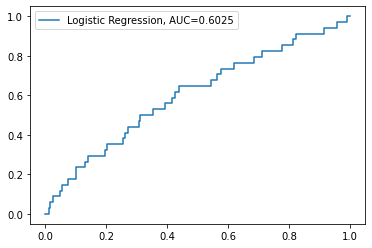

In [62]:
# ROC curve for Logistic Regression model

y_pred_6 = lr_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_6)
auc = round(roc_auc_score(y_test, y_pred_6), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend(loc='best')

### Decision Tree Classifier

In [63]:
dt_test_pred=dt_model.predict(x_test)
accuracy_score(y_test,dt_test_pred)

0.8085714285714286

In [64]:
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       316
           1       0.22      0.38      0.28        34

    accuracy                           0.81       350
   macro avg       0.57      0.62      0.58       350
weighted avg       0.86      0.81      0.83       350



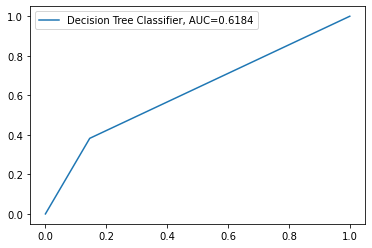

In [65]:
# ROC curve for Decision Tree Classifier

y_pred_7 = dt_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_7)
auc = round(roc_auc_score(y_test, y_pred_7), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))
plt.legend(loc='best')

### Random Forest Classifier

In [66]:
rf_test_pred=rf_model.predict(x_test)
accuracy_score(y_test,rf_test_pred)

0.9028571428571428

In [67]:
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       316
           1       0.50      0.03      0.06        34

    accuracy                           0.90       350
   macro avg       0.70      0.51      0.50       350
weighted avg       0.87      0.90      0.86       350



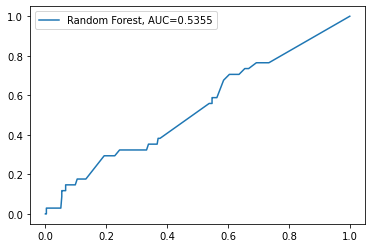

In [68]:
# ROC Curve for Random Forest Model
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_1 = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_1)
auc = round(roc_auc_score(y_test, y_pred_1), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
plt.legend(loc='best')

### Naive - Bayes

In [69]:
nb_test_pred=nb_model.predict(x_test)
accuracy_score(y_test,nb_test_pred)

0.7342857142857143

In [70]:
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       316
           1       0.18      0.50      0.27        34

    accuracy                           0.73       350
   macro avg       0.56      0.63      0.55       350
weighted avg       0.86      0.73      0.78       350



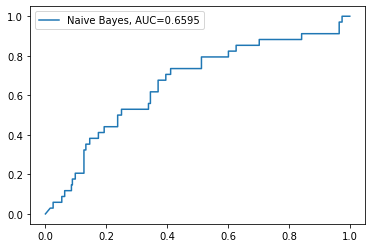

In [71]:
# ROC Curve for Naive Bayes Model

y_pred_3 = nb_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_3)
auc = round(roc_auc_score(y_test, y_pred_3), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))
plt.legend(loc='best')

### Perceptron

In [72]:
pr_test_pred=pr_model.predict(x_test)
accuracy_score(y_test,pr_test_pred)

0.6285714285714286

In [73]:
print(classification_report(y_test,pr_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       316
           1       0.10      0.35      0.16        34

    accuracy                           0.63       350
   macro avg       0.50      0.51      0.46       350
weighted avg       0.83      0.63      0.70       350



### KNN Model

In [74]:
knn_test_pred=knn_model.predict(x_test)
accuracy_score(y_test,knn_test_pred)

0.7

In [75]:
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       316
           1       0.10      0.26      0.15        34

    accuracy                           0.70       350
   macro avg       0.50      0.51      0.48       350
weighted avg       0.83      0.70      0.75       350



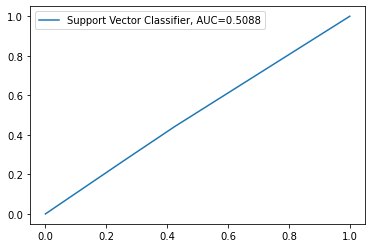

In [76]:
# ROC curve for KNN model

y_pred_5 = knn_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_5)
auc = round(roc_auc_score(y_test, y_pred_5), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC="+str(auc))
plt.legend(loc='best')

### Support Vector Classifier

In [77]:
svc_test_pred=svc_model.predict(x_test)
accuracy_score(y_test,svc_test_pred)

0.8857142857142857

In [78]:
print(classification_report(y_test,svc_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       316
           1       0.12      0.03      0.05        34

    accuracy                           0.89       350
   macro avg       0.51      0.50      0.49       350
weighted avg       0.83      0.89      0.85       350



# F1_scores

In [79]:
# F1 score for all models (macro avg)
from sklearn.metrics import f1_score

f1_lr=f1_score(y_test,lr_test_pred,average='macro')
f1_dt=f1_score(y_test,dt_test_pred,average='macro')
f1_rf=f1_score(y_test,rf_test_pred,average='macro')
f1_nb=f1_score(y_test,nb_test_pred,average='macro')
f1_per=f1_score(y_test,pr_test_pred,average='macro')
f1_knn=f1_score(y_test,knn_test_pred,average='macro')
f1_svc=f1_score(y_test,svc_test_pred,average='macro')

In [80]:
f1_scores=pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Randm Forest','Naive Bayes','Perceptron','KNN','SVC'],
                        'f1_scores':[f1_lr,f1_dt,f1_rf,f1_nb,f1_per,f1_knn,f1_svc]})


In [81]:
f1_scores.sort_values(by='f1_scores',ascending=False)

,Model,f1_scores
1,Decision Tree,0.584595
3,Naive Bayes,0.552706
2,Randm Forest,0.502175
6,SVC,0.493414
0,Logistic Regression,0.489583
5,KNN,0.482183
4,Perceptron,0.458874


Decision Tree Classifier and Naive Bayes both are performing well.

# Step-5: Final Model

In [82]:
import streamlit

In [83]:
dt_model_final=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,random_state=8)
dt_model_final.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy', random_state=8)

# Step-6: Model Deployment using streamlit

In [84]:
from pickle import dump
from pickle import load

dump(dt_model_final, open('dt.sav', 'wb'))

In [85]:
loaded_model = load(open('dt.sav', 'rb'))

In [ ]:
!streamlit run application.py